In [1]:
import pandas as pd
import numpy as np

In [17]:
### 와인 데이터 사용
wine = pd.read_csv('./data/08_wine.csv')
wine.info()

# pH : 수소이온농도(ph)는 물질의 산성과 알칼리성 정도
#  alcohol   sugar    pH    class
#  알콜도수   당도    농도   와인종류

### 범주  : 와인종류 (0 = 레드와인, 1 = 화이트와인)
# 범주가 2개인 이진분류이므로
wine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [18]:
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [23]:
wine_input = wine[['alcohol','sugar','pH']].to_numpy()
wine_target = wine['class'].to_numpy()

# print(wine_input)
# print(wine_target)
wine_input

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(wine_input,wine_target,test_size = 0.25,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

## 우선, 로지스틱회귀 분류로 해보기

In [37]:
## 훈련 /테스트 데이터 검증,계수 및 y절편까지 출력..
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target)


0.7859195402298851

In [38]:
print(lr.coef_, lr.intercept_)

[[ 0.53273869  1.67940585 -0.7090217 ]] [1.84713933]


In [42]:
predict_data = wine[['alcohol','sugar','pH']].to_numpy()

predcit_scaled = ss.transform(predict_data)

result_predict = lr.predict(predict_scaled)

wine_pred[
    
    
    
o_p = np.round(o_cnt / sum_cnt *100,2)
x_p = np.round(x_cnt / sum_cnt *100,2)
sum=

print('총 {}% 중 정답률[{}%]

TypeError: 'LogisticRegression' object is not iterable

## 결정트리(Decision Tree)

## 결정트리(Decision Tree)
###### - 질문(조건)을 통해서 트리(True와 False) 2개씩으로 가치를 치면서 분류를 한다.
###### - 질문을 스스로 찾아서, 계속해서 질문(조건)을 만들어 나가면서 분류(트리) 함
###### - 더 이상 질문이 없으면 결정(Decision)하게 된다.
###### - 분류 정확도가 높다.
###### -질문(조건)을 통해 분류해 나가는 절차를 시각화 가능하다(장점)
###### -시각화 함수: 사이킷런 패키지의 plot_tree(모델변수) 

In [49]:
### 사용하는 클래스 :  DecisionTreeClassifier
# 사용하는 패키지 : sklearn.Tree

from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(random_state=42)

df.fit(train_scaled,train_target)

print(df.score(train_scaled, train_target))
print(df.score(test_scaled, test_target))

0.9973316912972086
0.8516923076923076


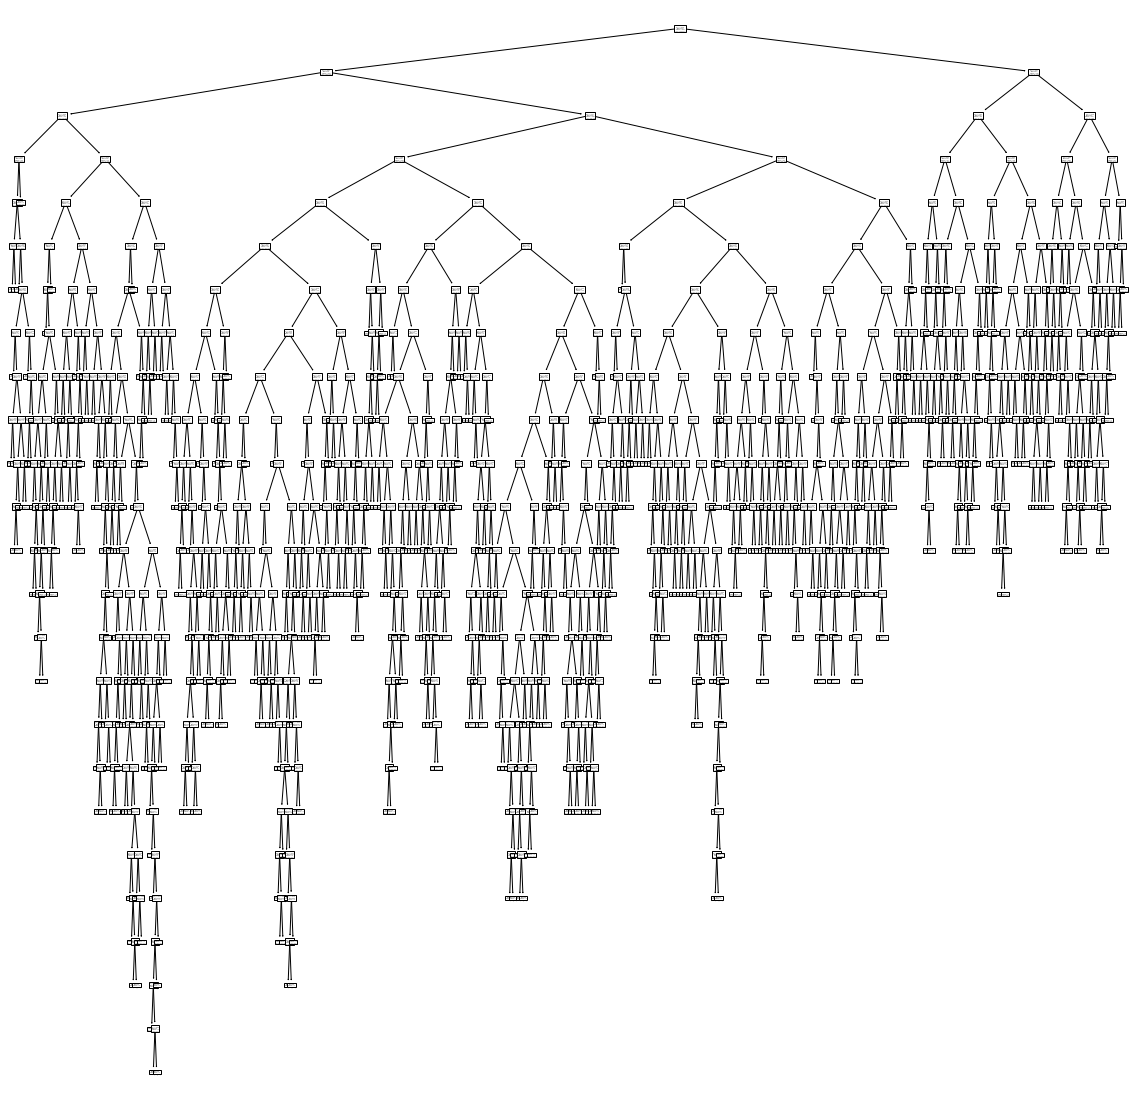

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize =(20,20))
plot_tree(df)
plt.show()

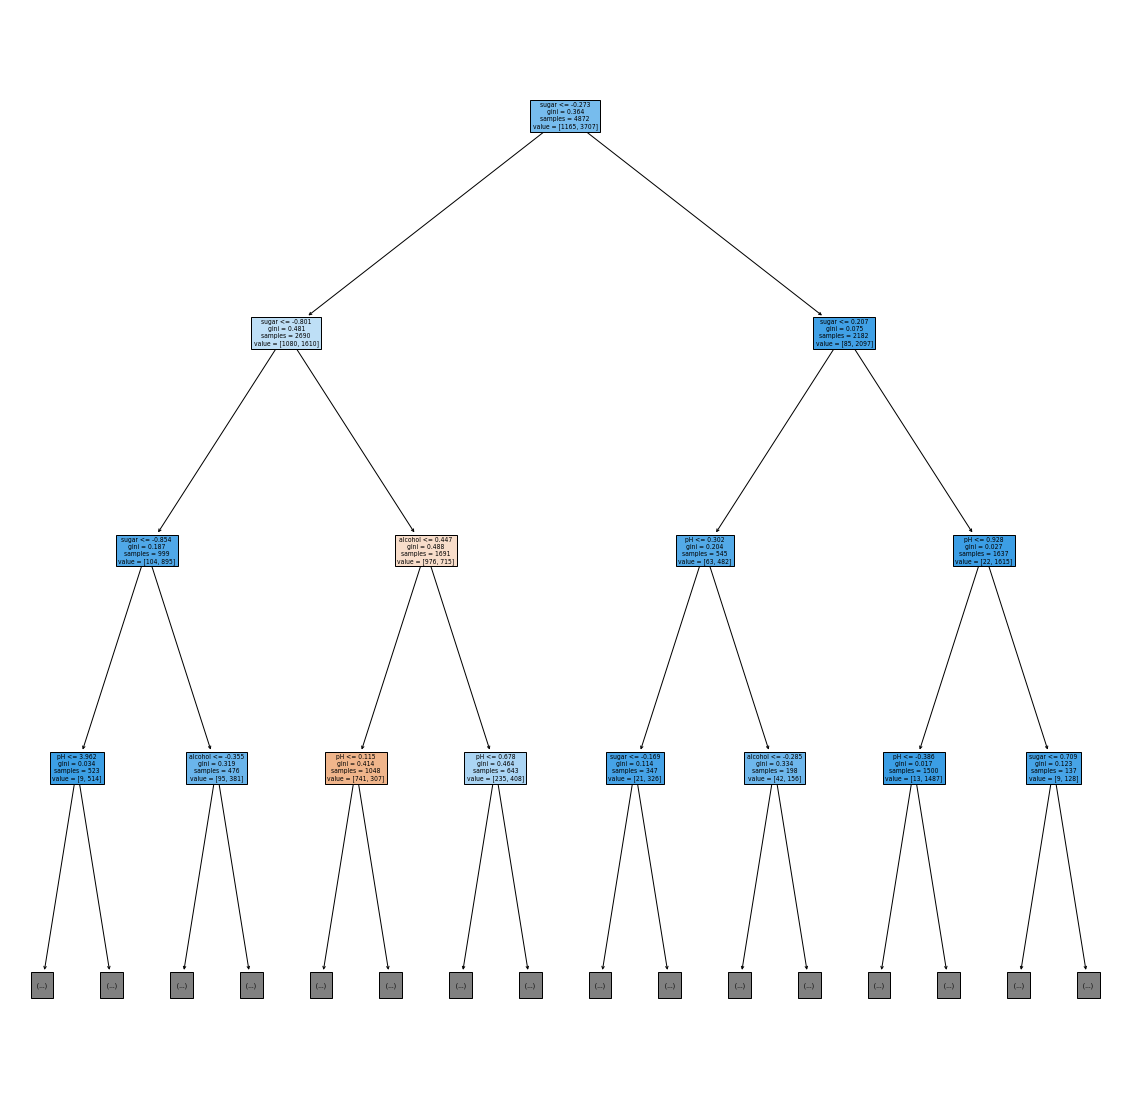

In [57]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# max_depth : 트리의 길이(첫번째를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름

plt.figure(figsize =(20,20))
plot_tree(df, max_depth=3, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()


# - gini : 불순도
# - samples : 훈련에 사용된 총 데이터 수
# - value : 범주별로 사용된(구분된) 데이터 수

# - 가장 첫번째 트리 : 루트노드(root node)
# - 가장 아래 트리 : 리프노드( leaf node)


## 가지치기
##### - max-depth : 트리의 갯수로 제한
##### - 트리가 너무 뻗어 나가도 정확도가 떨어집니다.
##### - 제한 없이 뻗어나가는 것을 mzx_depth로 제어

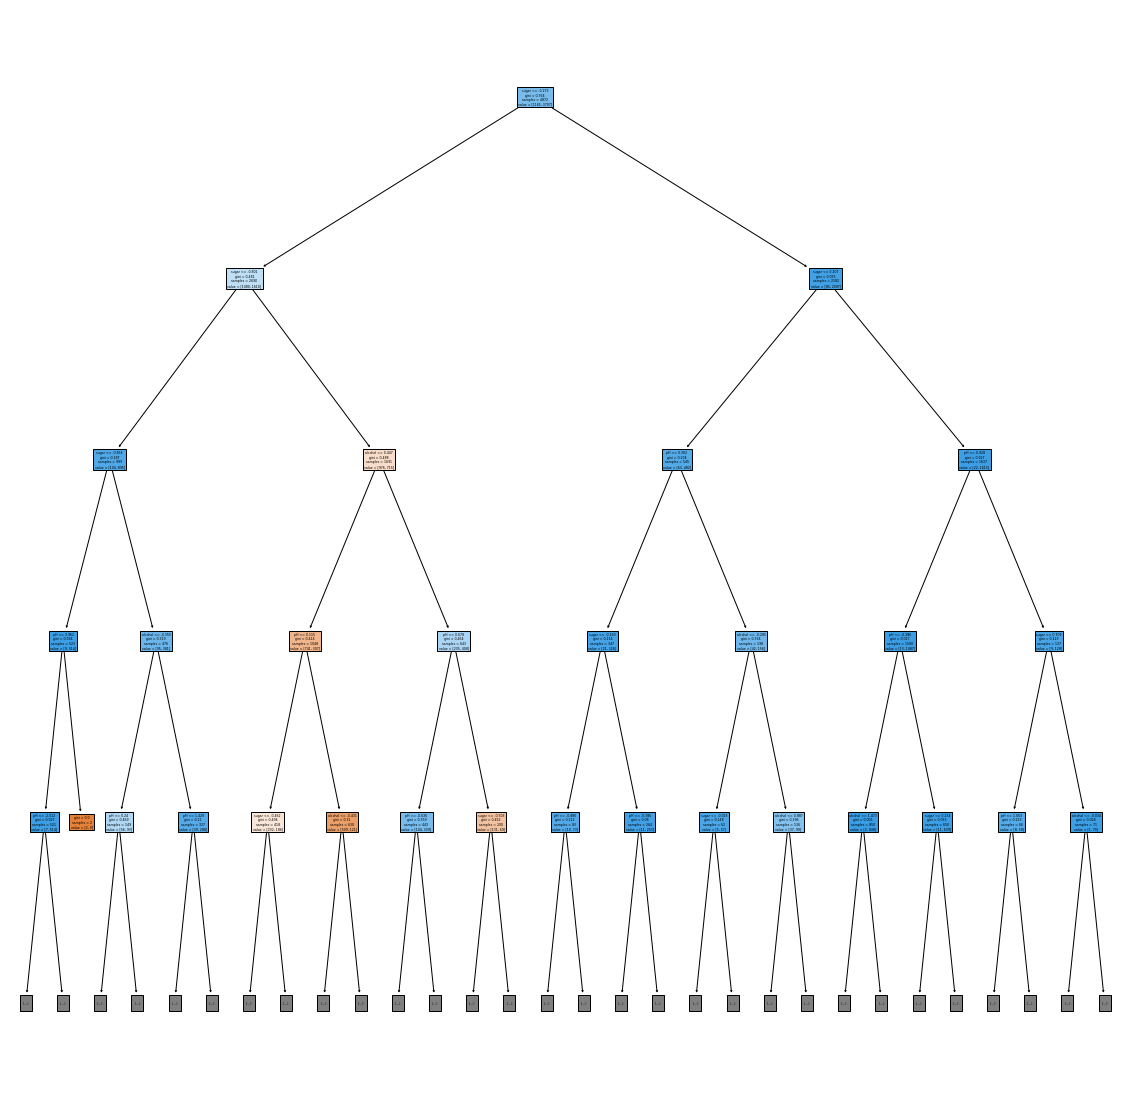

0.8499589490968801
0.8363076923076923


In [63]:
### max _depth 를 3으로 해서 다시 훈련을 시켜주세요
# - 훈련/테스트 정확도 확인까지...

dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_scaled,train_target)

plt.figure(figsize =(20,20))
plot_tree(df, max_depth=2, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()


## 특성중요도


In [64]:
### 트리 훈련에 사용된 독립변수(특성= 퓨처)들의 확인
# - 정확도가 가장 높은 독립변수가 훈련에 영향을 가장 많이 미쳤다고 판단

In [65]:
print(dt.feature_importances_)

[0.12871631 0.86213285 0.00915084]


In [91]:
wine2_input = wine[['sugar','pH']].to_numpy()
wine2_target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(wine2_input,wine2_target,test_size = 0.25,random_state=42)

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.9316502463054187
0.8221538461538461


In [ ]:
### <출력 결과>
#-class_pred가 추가된 데이터프레임 출력
# (출력결과) 데이터프레임의 5개 컬럼 모두 출력
# alcohol, sugar, pH, class, class_pred

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 갯수[6497]건 중에  , 정답갯수[5488]건, 오답 갯수[1009]건

# -정답률과 오답률 출력하기
# (출력 예시) 총 100.0%중 정답률[84.7%], 오답률[15.53%]